<center><h1 style="background-color:#8ffaaa;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 10px;padding: 5px"><b><u>Project: Caravan Insurance Challenge</u></b></h1></center>
<center><h2><b> </b></h2></center>

<center><img src="https://www.simon-kucher.com/sites/default/files/styles/670xh/public/2019-04/Blog_Banner_Digital_Insurance_ohne-Text_Vers-2.jpg?itok=gCZog3mg",height='300',width='600'></center>

##<h2> Introduction </h2>
The Caravan Insurance dataset contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data derived from zip area codes.

##<h2> Objective </h2>
To predict the potential buyers of caravan insurance policy.

**Data Preprocessing**

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd 
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [ ]:
#Changing working directory to drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive')

PROJECT_ROOT_DIR = "/content/drive/My Drive/Dataset/"
datafile_path = "/content/drive/My Drive/Dataset/caravan-insurance-challenge.csv"
output_path = "/content/drive/My Drive/Images"

# Cost / benefit:
# Cost to call = -10
# Benefit = 100
# b(Y,p) = b(TP) = 100 - 10 = 90
# c(N,p) = c(FN) = 0
# c(Y,n) = c(FP) = -10
# b(N,n) = b(TN) = 0
TP_amount = 90
FN_amount = 0
FP_amount = -10
TN_amount = 0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# For saving the figures
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, output_path, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Reading the data and viewing a snippet of the data

In [ ]:
data_all = pd.read_csv('/content/drive/My Drive/Dataset/caravan-insurance-challenge.csv')
data_all.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
data_all.info()  #viewing a summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORIGIN    9822 non-null   object
 1   MOSTYPE   9822 non-null   int64 
 2   MAANTHUI  9822 non-null   int64 
 3   MGEMOMV   9822 non-null   int64 
 4   MGEMLEEF  9822 non-null   int64 
 5   MOSHOOFD  9822 non-null   int64 
 6   MGODRK    9822 non-null   int64 
 7   MGODPR    9822 non-null   int64 
 8   MGODOV    9822 non-null   int64 
 9   MGODGE    9822 non-null   int64 
 10  MRELGE    9822 non-null   int64 
 11  MRELSA    9822 non-null   int64 
 12  MRELOV    9822 non-null   int64 
 13  MFALLEEN  9822 non-null   int64 
 14  MFGEKIND  9822 non-null   int64 
 15  MFWEKIND  9822 non-null   int64 
 16  MOPLHOOG  9822 non-null   int64 
 17  MOPLMIDD  9822 non-null   int64 
 18  MOPLLAAG  9822 non-null   int64 
 19  MBERHOOG  9822 non-null   int64 
 20  MBERZELF  9822 non-null   int64 
 21  MBERBOER  9822

In [ ]:
data_all["ORIGIN"].value_counts()  #value count of train & test set

train    5822
test     4000
Name: ORIGIN, dtype: int64

In [ ]:
data_all.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,0.873142,2.286602,1.887294,3.237324,4.302891,1.484525,3.307269,4.592038,1.898799,0.403278,0.545714,2.877113,2.226532,2.291183,1.650682,1.595093,2.204744,3.742211,1.068214,4.187742,4.819487,6.022501,1.335980,1.956730,6.254327,2.750662,2.577072,3.505498,2.739462,0.808491,...,2.956424,0.054877,0.170841,0.008858,0.019344,0.093565,0.011505,0.215027,0.202301,0.011505,0.018733,0.023315,1.849420,0.001629,0.015272,0.025351,0.016697,0.045408,0.400020,0.014050,0.021279,0.557218,0.011098,0.040216,0.002240,0.011403,0.034413,0.005192,0.071065,0.079821,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,0.961955,1.710674,1.779238,1.609139,1.984152,1.645968,1.723377,2.279839,1.814406,0.786792,1.106349,1.846703,1.748025,1.684008,1.742410,1.321487,1.534163,1.944900,1.298229,3.093127,3.093541,1.543980,1.213627,1.596842,2.000374,2.002960,2.073125,1.871365,1.950625,1.173771,...,2.921736,0.566108,0.888518,0.237556,0.200885,0.604350,0.215408,0.810899,0.910574,0.188699,0.213712,0.375350,1.881271,0.057058,0.244210,0.157198,0.211487,0.396983,0.492001,0.126058,0.144319,0.608575,0.129928,0.223622,0.068402,0.116251,0.249706,0.109954,0.267432,0.384431,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1

Creating the test set

In [ ]:
data_train = data_all.loc[data_all['ORIGIN'] == 'train']
data_test = data_all.loc[data_all['ORIGIN'] != 'train']
print(len(data_train), "train +", len(data_test), "test")

5822 train + 4000 test


In [ ]:
# Removing the "ORIGIN" attribute as it is not needed anymore
data_train = data_train.drop("ORIGIN", axis=1)
data_test = data_test.drop("ORIGIN", axis=1)

Exploring the data

In [ ]:
# Creating a copy of the training set so that we can modify
data = data_train.copy()

In [ ]:
# Proportion of CARAVAN data
data['CARAVAN'].value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

In [ ]:
corr_matrix = data.corr()

In [ ]:
corr_matrix["CARAVAN"].sort_values(ascending=False)

CARAVAN     1.000000
PPERSAUT    0.150910
APERSAUT    0.144210
APLEZIER    0.105700
PWAPART     0.096463
              ...   
MOSTYPE    -0.069385
MAUT0      -0.076501
MHHUUR     -0.079143
MINKM30    -0.079765
MOPLLAAG   -0.090561
Name: CARAVAN, Length: 86, dtype: float64

Saving figure scatter_matrix_plot


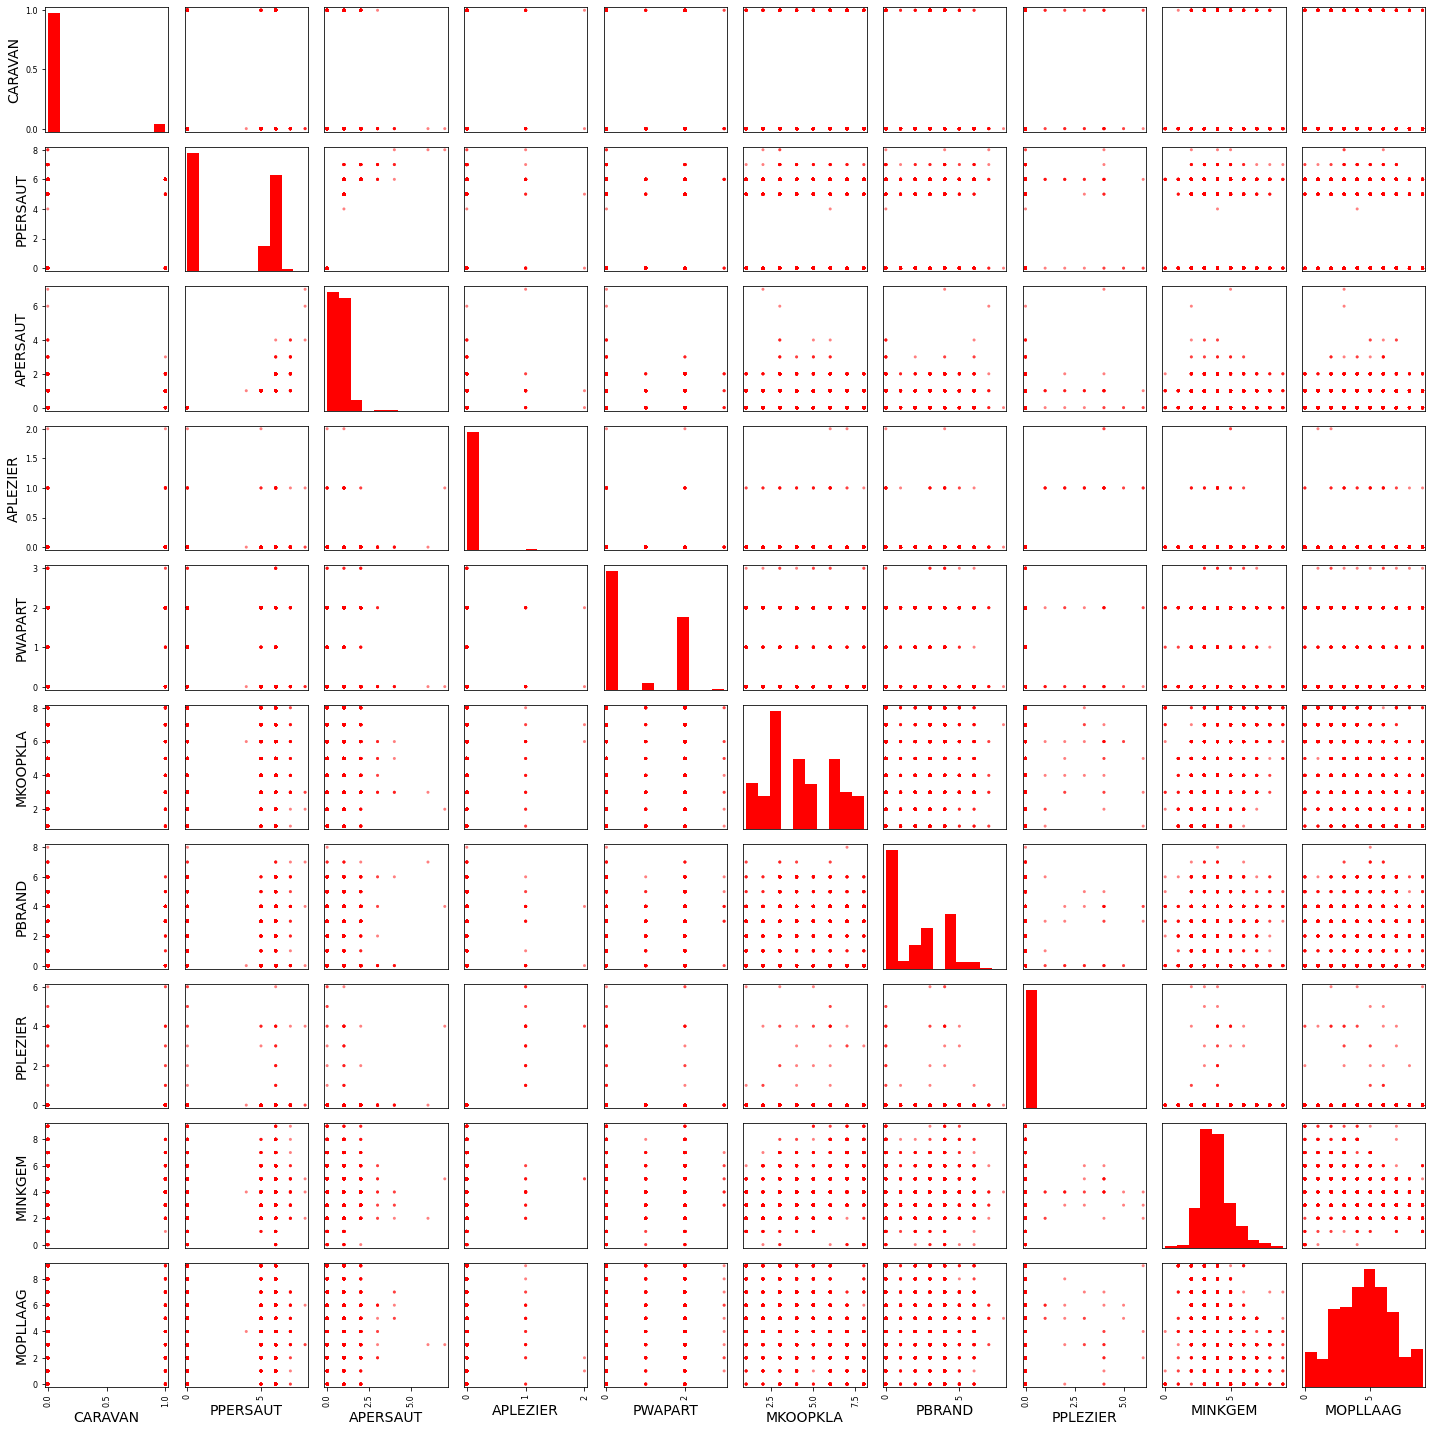

In [ ]:

from pandas.plotting import scatter_matrix

attributes = ["CARAVAN", "PPERSAUT", "APERSAUT", "APLEZIER", "PWAPART", "MKOOPKLA", "PBRAND", "PPLEZIER", "MINKGEM", "MOPLLAAG"]
scatter_matrix(data[attributes], figsize=(20, 20))
save_fig("scatter_matrix_plot")


Preparing the data

In [ ]:
target_name = ["NO_INS", "HAS_INS"]
target_columns = ["CARAVAN"]
# y_train = data_train[target_name].copy().values # to convert the dataframe to a NumPy array
y_train = data_train[target_columns].copy()
data = data_train.drop(target_columns, axis=1) # drop labels for training set

In [ ]:
y_test = data_test[target_columns].copy()
data_test = data_test.drop(target_columns, axis=1)

Cleaning the data:

- Managing outliers and Managing missing values

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

### Feature engineering

Handling Text and Categorical attributes

In [ ]:
# Dummification of "MOSTYPE" and "MOSHOOFD" nominal attributes
cat_attributes = ["MOSTYPE", "MOSHOOFD"]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer

# Pipeline for categorical attributes
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attributes)),
        ('label_binarizer', LabelBinarizer()),
    ])

#### Handling Numerical attributes

In [ ]:
# Numerical attributes
data_num = data.drop(cat_attributes, axis=1)
num_attributes = list(data_num)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Pipeline for numerical attributes
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attributes)),
        ('SimpleImputer', SimpleImputer(strategy="median")),
        ('std_scaler', MinMaxScaler())
    ])

Preparing the training set

In [ ]:
from sklearn.pipeline import Pipeline

# Union of features created by previous pipelines
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

full_pipeline = num_pipeline

In [ ]:
X_train = full_pipeline.fit_transform(data)

In [ ]:
features_name = num_attributes

In [ ]:
# Checking the shape of the prepared data
X_train.shape

(5822, 83)

In [ ]:
# Transforming y_train into a shape accepted by cross_val_score and cross_val_predict methods, with only 1 dimension
c, r = y_train.values.shape
print(c, r)
y_train_old = y_train
y_train = y_train.values.reshape(c,)

5822 1


Preparing the test set

In [ ]:
X_test = full_pipeline.transform(data_test)
X_test.shape

(4000, 83)

In [ ]:
# Transforming y_test into a shape accepted by cross_val_score and cross_val_predict methods, with only 1 dimension
c, r = y_test.values.shape
print(c, r)
y_test = y_test.values.reshape(c,)

4000 1


### Automatic feature selection

#### Tree-based feature selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

print("Initial shape: ", X_train.shape)

clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
print("New shape: ", X_new.shape)

sorted(zip(clf.feature_importances_, features_name), reverse=True)

Initial shape:  (5822, 83)
New shape:  (5822, 43)


[(0.06881210392285028, 'PBRAND'),
 (0.055689606393716326, 'PPERSAUT'),
 (0.04519411934458058, 'APERSAUT'),
 (0.040210218602940814, 'MKOOPKLA'),
 (0.027140310984249433, 'ABRAND'),
 (0.025762633051629194, 'PWAPART'),
 (0.018904598442386292, 'AWAPART'),
 (0.017086577249772895, 'MOPLMIDD'),
 (0.01704076842338414, 'MOPLHOOG'),
 (0.017002130943681002, 'MBERMIDD'),
 (0.016638491049554352, 'MOPLLAAG'),
 (0.01656325779260599, 'MGODGE'),
 (0.01604083642910383, 'MINK3045'),
 (0.015947996003653108, 'MFGEKIND'),
 (0.01589209691790168, 'MGODPR'),
 (0.015771507096192048, 'MBERARBG'),
 (0.015522431317595134, 'MFWEKIND'),
 (0.015520937884093415, 'MINK4575'),
 (0.015510837553850828, 'MSKC'),
 (0.015453477358153918, 'MINKGEM'),
 (0.015304049182808713, 'MSKB1'),
 (0.015249856251014781, 'MGODOV'),
 (0.015213927666823562, 'MHKOOP'),
 (0.014945593434855346, 'MSKB2'),
 (0.014774860100343986, 'MRELGE'),
 (0.014742055487976278, 'MSKA'),
 (0.014710839296724367, 'MINK7512'),
 (0.01456067858488675, 'MHHUUR'),
 (0.

#### Feature selection with recursive feature elimination

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress thi

Optimal number of features : 5


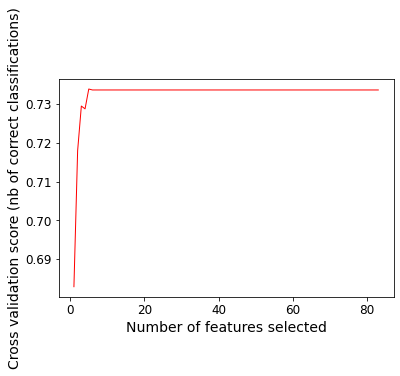

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

# Creating the RFE object and computing a cross-validated score.
svc = SVC(kernel="linear")
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10, max_leaf_nodes=None, min_impurity_decrease=0, min_impurity_split=None, min_samples_leaf=0.1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')

# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=dt, step=1, cv=StratifiedKFold(3),
              scoring='roc_auc', verbose = 0)
rfecv.fit(X_train, y_train)

# print(rfecv.ranking_)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Univariate feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

KBest = SelectKBest(chi2, k=20)
X_new = KBest.fit_transform(X_train, y_train)
sorted(zip(KBest.scores_, features_name), reverse=True)

[(47.58646350766274, 'PPERSAUT'),
 (36.04418966987095, 'APLEZIER'),
 (31.949407652298117, 'PPLEZIER'),
 (21.513776001146248, 'PWAPART'),
 (16.138631949080224, 'PBYSTAND'),
 (14.00580212778908, 'AWAPART'),
 (13.061632037074508, 'ABYSTAND'),
 (12.54157326198014, 'PBRAND'),
 (11.251117273784788, 'APERSAUT'),
 (9.527705575106664, 'MKOOPKLA'),
 (9.125613485077949, 'MHHUUR'),
 (8.352663327516815, 'MOPLHOOG'),
 (7.9598151963798145, 'MHKOOP'),
 (7.601619672963379, 'PGEZONG'),
 (6.958177616719548, 'MINKM30'),
 (6.5098651470372735, 'AGEZONG'),
 (6.126831193662437, 'MOPLLAAG'),
 (5.912689033634445, 'ABROM'),
 (5.882928351122764, 'PBROM'),
 (4.94349674657201, 'MAUT0'),
 (4.776010223640633, 'MSKA'),
 (4.6750338094227395, 'MBERHOOG'),
 (4.672956053271597, 'PFIETS'),
 (4.638353171185632, 'PWAOREG'),
 (4.093653434011674, 'MSKD'),
 (4.033935243000773, 'MBERBOER'),
 (3.994726026342571, 'AZEILPL'),
 (3.6853190429876337, 'MINK7512'),
 (3.250856047523577, 'MRELOV'),
 (3.168910968090792, 'AFIETS'),
 (3.1301

Recreating the DataFrame

In [ ]:
# Transforming the Numpy array into a Pandas DataFrame
data_prepared_df = pd.DataFrame(X_train, columns = num_attributes, index = list(data_num.index.values))
data_prepared_df.head()

,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.0,0.50,0.2,0.000000,0.555556,0.2,0.333333,0.777778,0.000000,0.222222,0.111111,0.222222,0.666667,0.111111,0.222222,0.777778,0.111111,0.0,0.111111,0.222222,0.555556,0.222222,0.111111,0.111111,0.222222,0.666667,0.111111,0.111111,0.888889,0.888889,0.000000,0.111111,0.888889,0.111111,0.000000,0.444444,0.555556,0.000000,0.0,0.444444,...,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
1,0.0,0.25,0.2,0.111111,0.444444,0.2,0.444444,0.666667,0.285714,0.222222,0.000000,0.444444,0.555556,0.000000,0.555556,0.444444,0.000000,0.0,0.000000,0.555556,0.000000,0.444444,0.000000,0.222222,0.333333,0.555556,0.000000,0.222222,0.777778,0.777778,0.142857,0.222222,0.666667,0.333333,0.222222,0.000000,0.555556,0.222222,0.0,0.555556,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
2,0.0,0.25,0.2,0.000000,0.444444,0.4,0.444444,0.333333,0.285714,0.444444,0.444444,0.444444,0.222222,0.000000,0.555556,0.444444,0.000000,0.0,0.000000,0.777778,0.000000,0.222222,0.000000,0.555556,0.000000,0.444444,0.000000,0.777778,0.222222,0.777778,0.000000,0.222222,1.000000,0.000000,0.444444,0.555556,0.000000,0.000000,0.0,0.333333,...,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
3,0.0,0.50,0.4,0.222222,0.333333,0.4,0.444444,0.555556,0.285714,0.222222,0.222222,0.333333,0.444444,0.333333,0.444444,0.222222,0.444444,0.0,0.000000,0.333333,0.111111,0.222222,0.333333,0.222222,0.111111,0.444444,0.000000,0.555556,0.444444,1.000000,0.000000,0.000000,0.777778,0.222222,0.111111,0.555556,0.333333,0.000000,0.0,0.444444,...,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
4,0.0,0.75,0.2,0.111111,0.444444,0.2,0.444444,0.777778,0.142857,0.222222,0.222222,0.444444,0.444444,0.555556,0.444444,0.000000,0.000000,1.0,0.444444,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.555556,0.666667,0.285714,0.111111,0.555556,0.444444,0.000000,0.000000,1.000000,0.000000,0.0,0.666667,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0


### Selecting and training a model

Utility functions

In [ ]:
# Display scores
def display_scores(scores):
    print('Scores:                        ', scores)
    print('Mean:                          '+"{:.2f}".format(scores.mean()))
    print('Standard deviation:            '+"{:.2f}".format(scores.std()))

In [ ]:
# Display confusion matrix
def display_conf_matrix(y_train, y_pred):
    # Confusion matrix: row -> actual, column -> predicted
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_train, y_pred))

In [ ]:
# Precision, recall, AUC, F1-score
def display_perf_metrics(y_train, y_pred, y_proba):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, cohen_kappa_score
    print('Accuracy           '+"{:.2f}".format(accuracy_score(y_train, y_pred)*100)+'%')
    print('Precision          '+"{:.2f}".format(precision_score(y_train, y_pred)*100)+'%')
    print('Recall             '+"{:.2f}".format(recall_score(y_train, y_pred)*100)+'%')
    print('F1                 '+"{:.2f}".format(f1_score(y_train, y_pred)))
    print('AUC                '+"{:.2f}".format(roc_auc_score(y_train, y_proba)))
    print('Cohen Kappa        '+"{:.2f}".format(cohen_kappa_score(y_train, y_pred)))

In [ ]:
# Plot precision / recall
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

In [ ]:
# Plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    from sklearn.metrics import auc
    plt.plot(fpr, tpr, linewidth=2, label=(label + ' (area = %0.2f)' % auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [ ]:
# Plot precision and recall vs threashold
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

In [ ]:
#Generating a plot of the test and training learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
# Profit calculation
def calculate_profit(cm, FN_amount, TP_amount, TN_amount, FP_amount):
    return (cm[0][0]*TN_amount + cm[1][0]*FN_amount + cm[0][1]*FP_amount +
                   cm[1][1]*TP_amount)

In [ ]:
# Creating ranking and profit data frame
def create_ranking_profit_df(name, y_actual, y_proba):
    # Writing a CSV file with results
    df_scores = pd.DataFrame({
            'score': y_proba[:,1],
            'actual': y_actual,
        })
    
    df_scores = df_scores.sort_values("score", ascending = False)
    df_scores["profit"] = (TP_amount - FP_amount) * df_scores["actual"] + FP_amount
    df_scores["cum_profit"] = df_scores["profit"].cumsum(axis = 0)
    print(df_scores["cum_profit"].values)
    print(ranking_profit_dt.head())
    
    # Saving a copy of the dataframe
    path = os.path.join(PROJECT_ROOT_DIR, output_path, "df_ranking_profit_" + name + ".csv")
    df_scores.to_csv(path)
    
    return df_scores

In [ ]:
# Plot profit curve
def plot_profit_curve(name, df_scores):
    plt.plot(df_scores["cum_profit"].values, linewidth=1, label=name + " Profit curve")
    plt.plot([0, 0], [0, 1], 'k--')
    plt.legend(loc="lower left")
    plt.xlabel('Number of test instances', fontsize=16)
    plt.ylabel('Profit', fontsize=16)
    plt.grid(True)

### Decision Tree

In [ ]:
# Creating the model
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
print(X_train.shape)
print(y_train.shape)

(5822, 83)
(5822,)


In [ ]:
# Using 10-fold cross validation to have a first view on model accuracy
from sklearn.model_selection import cross_val_score
score_dt = cross_val_score(clf_dt, X_train, y_train, cv=10, scoring="roc_auc", n_jobs=1)

In [ ]:
# Prediction using decision tree classifier
from sklearn.model_selection import cross_val_predict
y_pred_dt = cross_val_predict(clf_dt, X_train, y_train, cv=10, n_jobs=-1)
y_proba_dt = cross_val_predict(clf_dt, X_train, y_train, cv=10, method='predict_proba', n_jobs=-1)

In [ ]:
print(y_pred_dt)
print(y_proba_dt)
print(score_dt)

[0 0 0 ... 0 0 0]
[[0.87605295 0.12394705]
 [0.96470588 0.03529412]
 [0.94117647 0.05882353]
 ...
 [0.91446613 0.08553387]
 [0.91446613 0.08553387]
 [0.97551546 0.02448454]]
[0.73534932 0.74366528 0.63933018 0.68800988 0.75301645 0.65207626
 0.73674589 0.67662575 0.71681901 0.78662836]


In [ ]:
# Writing a CSV file with results
df_y_proba_dt = pd.DataFrame({
        'score': y_proba_dt[:,1],
        'actual': y_train,
        'pred': y_pred_dt
    })
print(df_y_proba_dt.sort_values('score', axis=0, ascending=False))
df_y_proba_dt.to_csv('Images/y_proba_dt.csv')

         score  actual  pred
2452  0.800000       0     1
130   0.800000       0     1
3703  0.714286       1     1
2797  0.666667       1     1
2270  0.666667       0     1
...        ...     ...   ...
3396  0.000000       0     0
559   0.000000       0     0
3554  0.000000       0     0
2661  0.000000       0     0
762   0.000000       1     0

[5822 rows x 3 columns]


In [ ]:
# Precision, recalls and thresholds
from sklearn.metrics import precision_recall_curve
precisions_dt, recalls_dt, thresholds_dt = precision_recall_curve(y_train, y_proba_dt[:,1])
print(precisions_dt)
print(recalls_dt)
print(thresholds_dt)

[0.05977327 0.05965274 0.06049885 0.06210162 0.0638505  0.06630525
 0.06922904 0.07221273 0.07645341 0.08194809 0.08960573 0.09937888
 0.10340776 0.11031579 0.11150442 0.11327762 0.11540342 0.11831863
 0.12243767 0.12357528 0.12658228 0.1295578  0.13707452 0.14950166
 0.15320665 0.15547264 0.16361257 0.16918429 0.17825312 0.19279661
 0.21465969 0.21798365 0.22580645 0.23030303 0.23616236 0.23478261
 0.2371134  0.22941176 0.23529412 0.24770642 0.28       0.29577465
 0.28846154 0.30555556 0.36842105 0.46666667 0.42857143 0.33333333
 0.         1.        ]
[1.         0.99712644 0.98275862 0.97988506 0.94252874 0.9137931
 0.88505747 0.85057471 0.82758621 0.80747126 0.79022989 0.7816092
 0.75862069 0.75287356 0.72413793 0.70114943 0.67816092 0.65517241
 0.63505747 0.59195402 0.54597701 0.47988506 0.42816092 0.38793103
 0.37068966 0.3591954  0.3591954  0.32183908 0.28735632 0.26149425
 0.23563218 0.22988506 0.22126437 0.2183908  0.18390805 0.15517241
 0.13218391 0.11206897 0.09195402 0.0775

In [ ]:
# Display scores
display_scores(score_dt)
display_conf_matrix(y_train, y_pred_dt)
display_perf_metrics(y_train, y_pred_dt, y_proba_dt[:,1])

Scores:                         [0.73534932 0.74366528 0.63933018 0.68800988 0.75301645 0.65207626
 0.73674589 0.67662575 0.71681901 0.78662836]
Mean:                          0.71
Standard deviation:            0.04
[[5470    4]
 [ 345    3]]
Accuracy           94.01%
Precision          42.86%
Recall             0.86%
F1                 0.02
AUC                0.71
Cohen Kappa        0.01


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_dt, target_names=target_name))

              precision    recall  f1-score   support

      NO_INS       0.94      1.00      0.97      5474
     HAS_INS       0.43      0.01      0.02       348

    accuracy                           0.94      5822
   macro avg       0.68      0.50      0.49      5822
weighted avg       0.91      0.94      0.91      5822



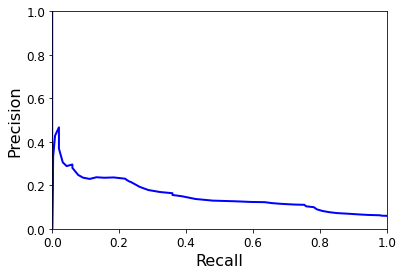

In [ ]:
# Plot precision / recall
plot_precision_vs_recall(precisions_dt, recalls_dt)
plt.show()

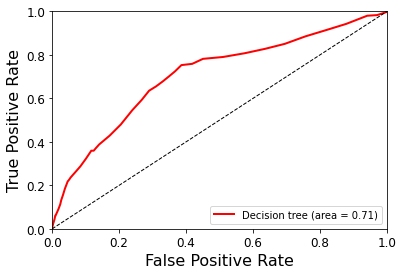

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_proba_dt[:,1])

#plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, "Decision tree")
plt.show()

###SVM, Logistic Regression  and Random Forrest Classifier

In [ ]:
# Creating the classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

clf_log = LogisticRegression(n_jobs=-1, random_state = 42)
clf_rf = RandomForestClassifier(n_jobs=-1, random_state = 42)
clf_svm = SVC(kernel = 'rbf', probability = True, random_state = 42)

# Creating a dataframe to manage the different classifiers
clf_list_values = [ ('Decision Tree', clf_dt),
                    ('Logistic Regression', clf_log),
                    ('Random Forrest', clf_rf),
                    ('SVM', clf_svm),
                ]
clf_list = pd.DataFrame.from_records(clf_list_values, columns=['name', 'clf'])

       Models Performance       
--------------------------------
---  DecisionTreeClassifier  ---
Accuracy           94.01%
Precision          42.86%
Recall             0.86%
F1                 0.02
AUC                0.71
Cohen Kappa        0.01
[[5470    4]
 [ 345    3]]
---  LogisticRegression  ---
Accuracy           93.99%
Precision          33.33%
Recall             0.57%
F1                 0.01
AUC                0.74
Cohen Kappa        0.01
[[5470    4]
 [ 346    2]]
---  RandomForestClassifier  ---
Accuracy           92.46%
Precision          13.60%
Recall             4.89%
F1                 0.07
AUC                0.69
Cohen Kappa        0.04
[[5366  108]
 [ 331   17]]
---  SVC  ---
Accuracy           94.02%
Precision          0.00%
Recall             0.00%
F1                 0.00
AUC                0.63
Cohen Kappa        0.00
[[5474    0]
 [ 348    0]]
Saving figure roc_curve_comparison_plot


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


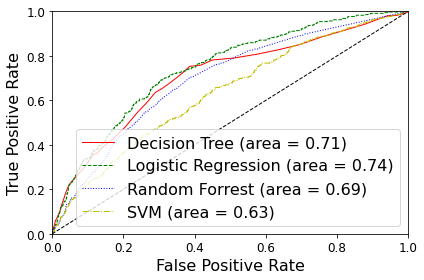

In [ ]:
from sklearn.metrics import roc_curve, auc
from cycler import cycler

print('       Models Performance       ')
print('--------------------------------')

plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'c', 'm', 'y', 'k']) +
                           cycler('linestyle', ['-', '--', ':', '-.','-', '--', ':', '-.'])))

for index, row in clf_list.iterrows():
    name = row['name']
    clf = row['clf']
    clf.fit(X_train, y_train)
    y_pred = cross_val_predict(clf, X_train, y_train, cv=10, n_jobs=-1)
    y_proba = cross_val_predict(clf, X_train, y_train, cv=10, method='predict_proba', n_jobs=-1)
    print("--- ", clf.__class__.__name__, " ---")
    display_perf_metrics(y_train, y_pred, y_proba[:,1]) 
    display_conf_matrix(y_train, y_pred)
    fpr, tpr, thresholds = roc_curve(y_train, y_proba[:,1])
    plt.plot(fpr, tpr, linewidth=1, label=name+" (area = %0.2f)" % auc(fpr, tpr))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
clf_rf
y_pred = cross_val_predict(clf_rf, X_train, y_train, cv=10, n_jobs=-1)
cm_rf_tmp = confusion_matrix(y_train, y_pred)
cm_rf_tmp

array([[5366,  108],
       [ 331,   17]])

## Models fine-tuning (using grid and random search)

### Decision Tree

#####Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = [
        {'max_depth': [5, 8, 10, 15, 20], 'max_features': [10, 20, 50, 80], 'min_samples_leaf': [0.0001, 0.001, 0.01, 0.1, 0.2]},
    ]

grid_search_dt = GridSearchCV(clf_dt, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("AUC= ", grid_search_dt.best_score_, grid_search_dt.best_params_)
grid_search_dt.best_estimator_

AUC=  0.7455133790225683 {'max_depth': 5, 'max_features': 80, 'min_samples_leaf': 0.001}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=80, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.001, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
cvres_grid = grid_search_dt.cv_results_
for mean_score, params in zip(cvres_grid["mean_test_score"], cvres_grid["params"]):
    print("AUC= ", mean_score, params)

AUC=  0.7028594459327779 {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 0.0001}
AUC=  0.6949674505464646 {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 0.001}
AUC=  0.7218184258114398 {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 0.01}
AUC=  0.7193807070129029 {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 0.1}
AUC=  0.6941243057663014 {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 0.2}
AUC=  0.7143883486453746 {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 0.0001}
AUC=  0.7225094355050248 {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 0.001}
AUC=  0.713823755761297 {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 0.01}
AUC=  0.7113422307725132 {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 0.1}
AUC=  0.7180016837360528 {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 0.2}
AUC=  0.7388012021392527 {'max_depth': 5, 'max_features': 50, 'min_samples_leaf': 0.0001}
AUC=  0.7385795748356044 {'ma

In [ ]:
feature_importances_grid = grid_search_dt.best_estimator_.feature_importances_
sorted(zip(feature_importances_grid, features_name), reverse=True)

[(0.2933221783635598, 'PPERSAUT'),
 (0.1890667227289772, 'PBRAND'),
 (0.14035952678900981, 'MOPLLAAG'),
 (0.10670080788783444, 'APLEZIER'),
 (0.06893953493881312, 'MGODGE'),
 (0.035765693155123686, 'PPLEZIER'),
 (0.030785350003397195, 'MBERHOOG'),
 (0.024035340759528328, 'PFIETS'),
 (0.02311621312705609, 'ALEVEN'),
 (0.021180323023363076, 'MHHUUR'),
 (0.017412032923002044, 'MFGEKIND'),
 (0.017402889194813802, 'PWAOREG'),
 (0.015116845549885887, 'MBERARBG'),
 (0.014191200175241527, 'MINKM30'),
 (0.0026053413803940983, 'MSKC'),
 (0.0, 'PZEILPL'),
 (0.0, 'PWERKT'),
 (0.0, 'PWAPART'),
 (0.0, 'PWALAND'),
 (0.0, 'PWABEDR'),
 (0.0, 'PVRAAUT'),
 (0.0, 'PTRACTOR'),
 (0.0, 'PPERSONG'),
 (0.0, 'PMOTSCO'),
 (0.0, 'PLEVEN'),
 (0.0, 'PINBOED'),
 (0.0, 'PGEZONG'),
 (0.0, 'PBYSTAND'),
 (0.0, 'PBROM'),
 (0.0, 'PBESAUT'),
 (0.0, 'PAANHANG'),
 (0.0, 'MZPART'),
 (0.0, 'MZFONDS'),
 (0.0, 'MSKD'),
 (0.0, 'MSKB2'),
 (0.0, 'MSKB1'),
 (0.0, 'MSKA'),
 (0.0, 'MRELSA'),
 (0.0, 'MRELOV'),
 (0.0, 'MRELGE'),
 (0.0, 

##### Randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'max_depth': randint(low=4, high=20),
        'max_features': randint(low=10, high=80),
        'min_samples_leaf': randint(low=1, high=100)
    }

rnd_search = RandomizedSearchCV(clf_dt, param_distributions=param_distribs,
                                n_iter=200, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=3,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
               

In [ ]:
print("AUC= ", rnd_search.best_score_, rnd_search.best_params_)
rnd_search.best_estimator_

AUC=  0.7414137926743509 {'max_depth': 4, 'max_features': 71, 'min_samples_leaf': 84}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=71, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=84, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
cvres_rnd = rnd_search.cv_results_
for mean_score, params in zip(cvres_rnd["mean_test_score"], cvres_rnd["params"]):
    print("AUC= ", mean_score, params)

AUC=  0.7173274433594639 {'max_depth': 10, 'max_features': 61, 'min_samples_leaf': 93}
AUC=  0.6657607544857529 {'max_depth': 18, 'max_features': 70, 'min_samples_leaf': 21}
AUC=  0.6128896438488898 {'max_depth': 10, 'max_features': 33, 'min_samples_leaf': 3}
AUC=  0.6403455069207633 {'max_depth': 9, 'max_features': 62, 'min_samples_leaf': 2}
AUC=  0.7053002267247785 {'max_depth': 11, 'max_features': 39, 'min_samples_leaf': 38}
AUC=  0.7105063221980622 {'max_depth': 5, 'max_features': 73, 'min_samples_leaf': 60}
AUC=  0.7179762760015687 {'max_depth': 8, 'max_features': 42, 'min_samples_leaf': 76}
AUC=  0.7271374044484846 {'max_depth': 13, 'max_features': 31, 'min_samples_leaf': 89}
AUC=  0.7262807613492143 {'max_depth': 4, 'max_features': 68, 'min_samples_leaf': 42}
AUC=  0.7124244320590355 {'max_depth': 19, 'max_features': 69, 'min_samples_leaf': 80}
AUC=  0.7057980535229345 {'max_depth': 18, 'max_features': 71, 'min_samples_leaf': 62}
AUC=  0.7025300502753032 {'max_depth': 18, 'max_f

In [ ]:
feature_importances_rnd = rnd_search.best_estimator_.feature_importances_
sorted(zip(feature_importances_rnd, features_name), reverse=True)

[(0.4302585847235291, 'PPERSAUT'),
 (0.20588586817956814, 'MOPLLAAG'),
 (0.19427417015303497, 'PBRAND'),
 (0.04040894284898786, 'MINKGEM'),
 (0.032820963576132546, 'MGEMLEEF'),
 (0.023686421671867148, 'MINKM30'),
 (0.023077701904005442, 'MKOOPKLA'),
 (0.019490483324525954, 'MBERARBG'),
 (0.012601117257260234, 'MGODGE'),
 (0.006486270288703682, 'MRELGE'),
 (0.005831837477573022, 'MBERMIDD'),
 (0.005177638594811744, 'MFWEKIND'),
 (0.0, 'PZEILPL'),
 (0.0, 'PWERKT'),
 (0.0, 'PWAPART'),
 (0.0, 'PWAOREG'),
 (0.0, 'PWALAND'),
 (0.0, 'PWABEDR'),
 (0.0, 'PVRAAUT'),
 (0.0, 'PTRACTOR'),
 (0.0, 'PPLEZIER'),
 (0.0, 'PPERSONG'),
 (0.0, 'PMOTSCO'),
 (0.0, 'PLEVEN'),
 (0.0, 'PINBOED'),
 (0.0, 'PGEZONG'),
 (0.0, 'PFIETS'),
 (0.0, 'PBYSTAND'),
 (0.0, 'PBROM'),
 (0.0, 'PBESAUT'),
 (0.0, 'PAANHANG'),
 (0.0, 'MZPART'),
 (0.0, 'MZFONDS'),
 (0.0, 'MSKD'),
 (0.0, 'MSKC'),
 (0.0, 'MSKB2'),
 (0.0, 'MSKB1'),
 (0.0, 'MSKA'),
 (0.0, 'MRELSA'),
 (0.0, 'MRELOV'),
 (0.0, 'MOPLMIDD'),
 (0.0, 'MOPLHOOG'),
 (0.0, 'MINK7

#### Best decision tree model

In [ ]:
clf_best_dt = grid_search_dt.best_estimator_
clf_best_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=80, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.001, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred_dt = cross_val_predict(clf_best_dt, X_train, y_train, cv=10, n_jobs=-1)
y_proba_dt = cross_val_predict(clf_best_dt, X_train, y_train, cv=10, method='predict_proba', n_jobs=-1)
ranking_profit_dt = create_ranking_profit_df("Decision Tree", y_train, y_proba_dt)

[   -10    -20    -30 ... -23400 -23410 -23420]
         score  actual  profit  cum_profit
5630  1.000000       0     -10         -10
2955  0.818182       0     -10         -20
1595  0.818182       0     -10         -30
5092  0.714286       0     -10         -40
811   0.714286       1      90          50


In [ ]:
ranking_profit_dt.head()

,score,actual,profit,cum_profit
5630,1.000000,0,-10,-10
2955,0.818182,0,-10,-20
1595,0.818182,0,-10,-30
5092,0.714286,0,-10,-40
811,0.714286,1,90,50


##### Performance metrics

In [ ]:
# Performance metrics
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_train, y_pred_dt)
display_conf_matrix(y_train, y_pred_dt)
display_perf_metrics(y_train, y_pred_dt, y_proba_dt[:,1])

[[5460   14]
 [ 344    4]]
Accuracy           93.85%
Precision          22.22%
Recall             1.15%
F1                 0.02
AUC                0.73
Cohen Kappa        0.02


##### Precision / recall curve

In [ ]:
# Precision, recalls and thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_proba_dt[:,1])
print(precisions)
print(recalls)
print(thresholds)

[0.05977327 0.06081318 0.06141593 0.06209735 0.06314056 0.06441374
 0.06540977 0.0669049  0.06656038 0.06860922 0.07116827 0.07323628
 0.07427785 0.07599717 0.07787482 0.07838304 0.07836836 0.07848477
 0.079155   0.07981462 0.08057366 0.08063674 0.08069992 0.08188248
 0.08347627 0.08592814 0.08984868 0.09388573 0.09781844 0.10082151
 0.10143288 0.10109807 0.10225505 0.10367084 0.10230489 0.10408765
 0.10715854 0.11018519 0.11170732 0.11538462 0.11546392 0.11512648
 0.11895709 0.12227325 0.12772397 0.13402733 0.13781399 0.13764625
 0.13802622 0.13953488 0.14070352 0.14131218 0.14202899 0.14735226
 0.14883721 0.14840715 0.15205149 0.15121136 0.15496575 0.15599639
 0.15719697 0.16164659 0.16578108 0.17366629 0.17312073 0.17276888
 0.17345751 0.17386231 0.17948718 0.17981889 0.1796875  0.18169761
 0.18218085 0.18463612 0.18269231 0.18857143 0.18944099 0.19085174
 0.19047619 0.19323671 0.19312602 0.19376026 0.19072165 0.19279279
 0.19813084 0.19736842 0.19465649 0.19729207 0.2        0.2028

Saving figure precision_vs_recall_plot_optimized_model_dt


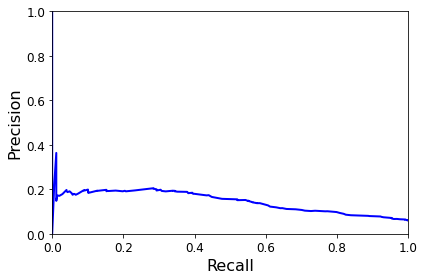

In [ ]:
# Plot precision / recall
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot_optimized_model_dt")
plt.show()

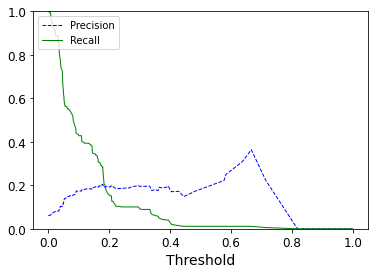

In [ ]:
# Plot precision and recall vs threshold
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

##### ROC curve

Saving figure roc_curve_plot_optimized_model_dt


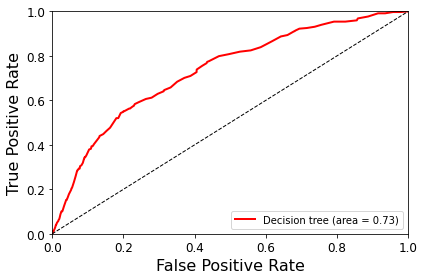

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_proba_dt[:,1])

plot_roc_curve(fpr, tpr, "Decision tree")
save_fig("roc_curve_plot_optimized_model_dt")
plt.show()

### Logistic Regression

#### Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = [
        {'solver' : ['newton-cg', 'lbfgs', 'sag'], 'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] },
        {'solver' : ['liblinear'], 'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
    ]

grid_search_log = GridSearchCV(clf_log, param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search_log.fit(X_train, y_train)

print("Precision= ", grid_search_log.best_score_, grid_search_log.best_params_)
grid_search_log.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Precision=  0.25 {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=42,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
cvres_grid_log = grid_search_log.cv_results_
for mean_score, params in zip(cvres_grid_log["mean_test_score"], cvres_grid_log["params"]):
    print("Precision= ", mean_score, params)

Precision=  0.0 {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
Precision=  0.0 {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
Precision=  0.0 {'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}
Precision=  0.0 {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Precision=  0.0 {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Precision=  0.0 {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}
Precision=  0.0 {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Precision=  0.0 {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Precision=  0.0 {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
Precision=  0.2 {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Precision=  0.2 {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Precision=  0.2 {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
Precision=  0.15 {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Precision=  0.15 {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Precision=  0.15 {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
Precision=  0.22000000000000003 {'C': 100,

#### Best logistic regression model

In [ ]:
clf_best_log = grid_search_log.best_estimator_
clf_best_log

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=42,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_pred_log = cross_val_predict(clf_best_log, X_train, y_train, cv=10, n_jobs=-1)
y_proba_log = cross_val_predict(clf_best_log, X_train, y_train, cv=10, method='predict_proba', n_jobs=-1)
ranking_profit_log = create_ranking_profit_df("Logistic Regression", y_train, y_proba_log)

[    90     80     70 ... -23400 -23410 -23420]
         score  actual  profit  cum_profit
5630  1.000000       0     -10         -10
2955  0.818182       0     -10         -20
1595  0.818182       0     -10         -30
5092  0.714286       0     -10         -40
811   0.714286       1      90          50


In [ ]:
ranking_profit_log.head()

,score,actual,profit,cum_profit
2953,0.960082,1,90,90
4618,0.834794,0,-10,80
130,0.820525,0,-10,70
206,0.761757,0,-10,60
2188,0.739595,0,-10,50


##### Performance metrics

In [ ]:
# Performance metrics
cm_log = confusion_matrix(y_train, y_pred_log)
display_conf_matrix(y_train, y_pred_log)
display_perf_metrics(y_train, y_pred_log, y_proba_log[:,1])

[[5460   14]
 [ 346    2]]
Accuracy           93.82%
Precision          12.50%
Recall             0.57%
F1                 0.01
AUC                0.74
Cohen Kappa        0.01


##### Precision / recall curve

In [ ]:
# Precision, recalls and thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_proba_log[:,1])
print(precisions)
print(recalls)
print(thresholds)

[0.0607012  0.06053733 0.0605479  ... 0.5        1.         1.        ]
[1.         0.99712644 0.99712644 ... 0.00287356 0.00287356 0.        ]
[0.00371687 0.00373567 0.00375789 ... 0.82052514 0.83479409 0.96008209]


Saving figure precision_vs_recall_plot_optimized_model_dt


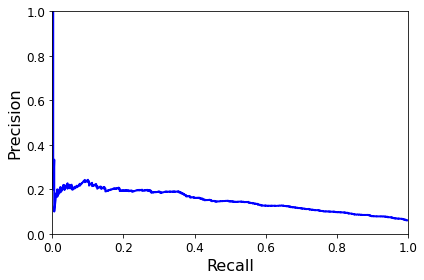

In [ ]:
# Plot precision / recall
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot_optimized_model_dt")
plt.show()

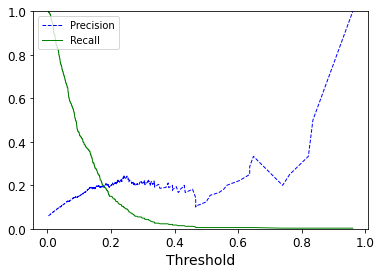

In [ ]:
# Plot precision and recall vs threshold
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

##### ROC curve

Saving figure roc_curve_plot_optimized_model_dt


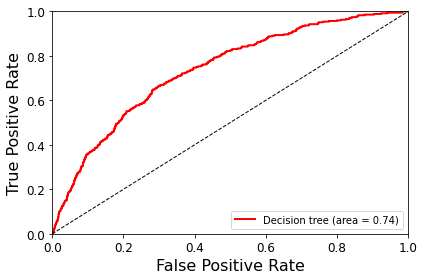

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_proba_log[:,1])

plot_roc_curve(fpr, tpr, "Decision tree")
save_fig("roc_curve_plot_optimized_model_dt")
plt.show()

### Random forest

#### Grid search

In [ ]:
# Selecting best features from previous decision tree
model = SelectFromModel(clf_best_dt, prefit=True)
X_new = model.transform(X_train)
print("Nb of features selected: ", X_new.shape)

Nb of features selected:  (5822, 14)


In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = [
        {'max_depth': [5, 8, 10, 15, 20], 'max_features': [5, 8, 13], 'min_samples_leaf': [0.0001, 0.001, 0.01, 0.1, 0.2]},
    ]

grid_search_rf = GridSearchCV(clf_rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_new, y_train)

print("F1= ", grid_search_rf.best_score_, grid_search_rf.best_params_)
clf_rf2 = grid_search_rf.best_estimator_
clf_rf2

F1=  0.0927705963395279 {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 0.0001}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.0001, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
cvres_grid_rf = grid_search_rf.cv_results_
for mean_score, params in zip(cvres_grid_rf["mean_test_score"], cvres_grid_rf["params"]):
    print("F1= ", mean_score, params)

F1=  0.005714285714285714 {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 0.0001}
F1=  0.0 {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 0.001}
F1=  0.0 {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 0.01}
F1=  0.0 {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 0.1}
F1=  0.0 {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 0.2}
F1=  0.011428571428571429 {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 0.0001}
F1=  0.0 {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 0.001}
F1=  0.0 {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 0.01}
F1=  0.0 {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 0.1}
F1=  0.0 {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 0.2}
F1=  0.00563380281690141 {'max_depth': 5, 'max_features': 13, 'min_samples_leaf': 0.0001}
F1=  0.0 {'max_depth': 5, 'max_features': 13, 'min_samples_leaf': 0.001}
F1=  0.0 {'max_depth': 5, 'max_features': 13, 'min_samples_leaf': 0.01}
F1=  0.0 {'max_dept

#### Best random forest model

In [ ]:
clf_best_rf = grid_search_rf.best_estimator_
clf_best_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.0001, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf = cross_val_predict(clf_best_rf, X_new, y_train, cv=10, n_jobs=-1)
y_proba_rf = cross_val_predict(clf_best_rf, X_new, y_train, cv=10, method='predict_proba', n_jobs=-1)
ranking_profit_rf = create_ranking_profit_df("Random Forest", y_train, y_proba_rf)

[   -10    -20    -30 ... -23400 -23410 -23420]
         score  actual  profit  cum_profit
5630  1.000000       0     -10         -10
2955  0.818182       0     -10         -20
1595  0.818182       0     -10         -30
5092  0.714286       0     -10         -40
811   0.714286       1      90          50


##### Performance metrics

In [ ]:
# Performance metrics
cm_rf = confusion_matrix(y_train, y_pred_rf)
display_conf_matrix(y_train, y_pred_rf)
display_perf_metrics(y_train, y_pred_rf, y_proba_rf[:,1])

[[5337  137]
 [ 326   22]]
Accuracy           92.05%
Precision          13.84%
Recall             6.32%
F1                 0.09
AUC                0.72
Cohen Kappa        0.05


##### Precision / recall curve

In [ ]:
# Precision, recalls and thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_proba_rf[:,1])

Saving figure precision_vs_recall_plot_optimized_model_rf


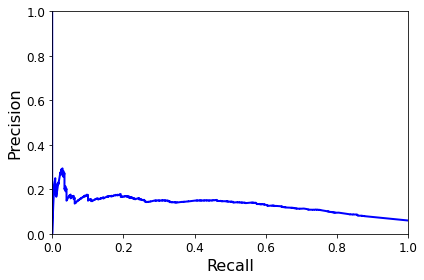

In [ ]:
# Plot precision / recall
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot_optimized_model_rf")
plt.show()

Saving figure precision_recall_vs_threshold_plot_optimized_model_rf


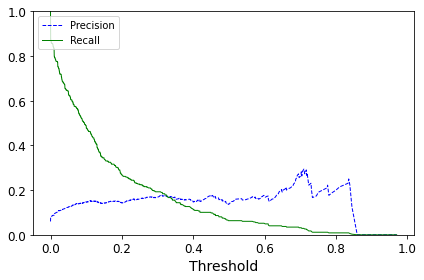

In [ ]:
# Plot precision and recall vs threshold
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
save_fig("precision_recall_vs_threshold_plot_optimized_model_rf")
plt.show()

##### ROC curve

Saving figure roc_curve_plot_optimized_model_rf


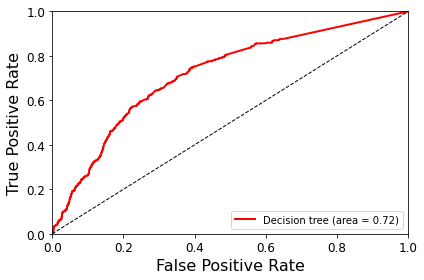

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_proba_rf[:,1])

plot_roc_curve(fpr, tpr, "Decision tree")
save_fig("roc_curve_plot_optimized_model_rf")
plt.show()

### Learning curves

#### Decision Tree

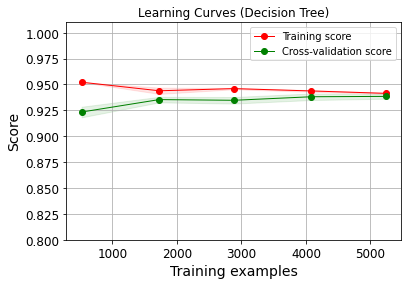

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

title = "Learning Curves (Decision Tree)"
plot_learning_curve(clf_best_dt, title, X_train, y_train, (0.8, 1.01), cv=10, n_jobs=7, train_sizes=[ 0.1, 0.33, 0.55, 0.78, 1.])

plt.show()

The results show underfitting of the data. The score can be improved.

#### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/

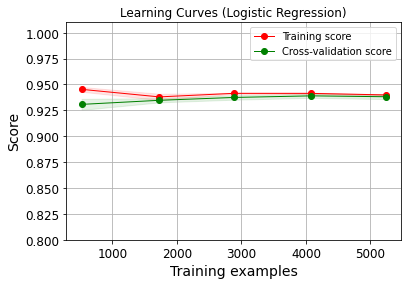

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

title = "Learning Curves (Logistic Regression)"
plot_learning_curve(clf_best_log, title, X_train, y_train, (0.8, 1.01), cv=10, n_jobs=1, train_sizes=[ 0.1, 0.33, 0.55, 0.78, 1.])

plt.show()

The result shows underfitting of the data. The score can be improved.

#### Random forest

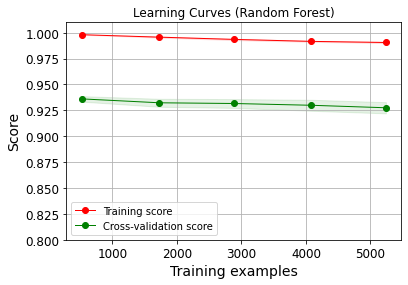

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

title = "Learning Curves (Random Forest)"
plot_learning_curve(clf_best_rf, title, X_train, y_train, (0.8, 1.01), cv=10, n_jobs=7, train_sizes=[ 0.1, 0.33, 0.55, 0.78, 1.])

plt.show()

Overfitting of data is occuring

## Cost / benefit matrix

Using a cost / benefit matrix to identify the best threshold.

In [ ]:
print(cm_dt)
print(cm_log)
print(cm_rf)

[[5460   14]
 [ 344    4]]
[[5460   14]
 [ 346    2]]
[[5337  137]
 [ 326   22]]


In [ ]:
print('Compare Profit from Models')
print('-------------------------------------')

Profit_DT = calculate_profit(cm_dt, FN_amount, TP_amount, TN_amount, FP_amount)
print('Decision Tree Profit:        ' + str(Profit_DT))

Profit_LOG = calculate_profit(cm_log, FN_amount, TP_amount, TN_amount, FP_amount)
print('Logistic Regression Profit:  ' + str(Profit_LOG))

Profit_RF = calculate_profit(cm_rf, FN_amount, TP_amount, TN_amount, FP_amount)
print('Random Forest Profit:        ' + str(Profit_RF))

Compare Profit from Models
-------------------------------------
Decision Tree Profit:        220
Logistic Regression Profit:  40
Random Forest Profit:        610


## Profit curve

Saving figure profit_curve


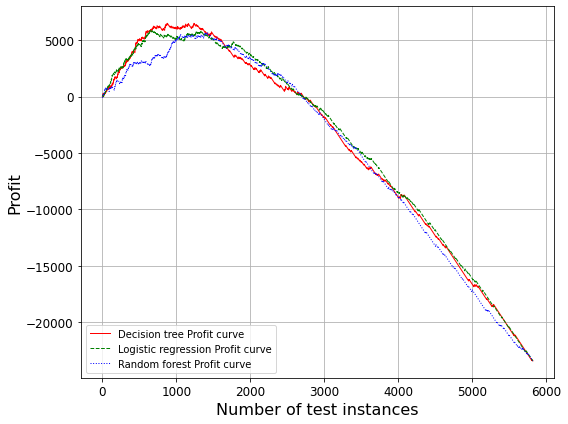

In [ ]:
# Plot profit curve
plt.figure(figsize=(8, 6))
plot_profit_curve("Decision tree", ranking_profit_dt)
plot_profit_curve("Logistic regression", ranking_profit_log)
plot_profit_curve("Random forest", ranking_profit_rf)
save_fig("profit_curve")
plt.show()

## Conclusion

**Most important features identified are:**

- PPERSAUT: Contribution car policies
- PBRAND: Contribution fire policies
- MOPLLAAG: Lower level education

In [ ]:
y_pred_final = cross_val_predict(clf_best_dt, X_test, y_test, cv=10, n_jobs=-1)
y_proba_final = cross_val_predict(clf_best_dt, X_test, y_test, cv=10, method='predict_proba', n_jobs=-1)
ranking_profit_final = create_ranking_profit_df("Decision Tree", y_test, y_proba_final)

[   -10    -20     70 ... -16280 -16190 -16200]
         score  actual  profit  cum_profit
5630  1.000000       0     -10         -10
2955  0.818182       0     -10         -20
1595  0.818182       0     -10         -30
5092  0.714286       0     -10         -40
811   0.714286       1      90          50


In [ ]:
ranking_profit_final

,score,actual,profit,cum_profit
2403,0.80,0,-10,-10
1915,0.75,0,-10,-20
718,0.75,1,90,70
2880,0.75,0,-10,60
2603,0.75,0,-10,50
...,...,...,...,...
3180,0.00,0,-10,-16260
328,0.00,0,-10,-16270
268,0.00,0,-10,-16280
1846,0.00,1,90,-16190


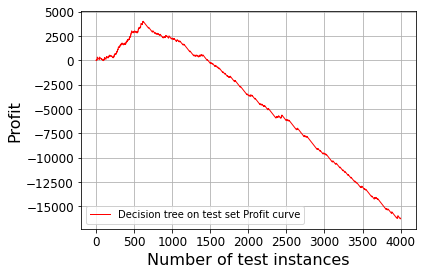

In [ ]:
plot_profit_curve("Decision tree on test set", ranking_profit_final)